# Exploratory Data Analysis on FICO

Suppose that you work for a consumer credit reporting agency. 

Your company procures and aggregates information on people and businesses. 

You are the chief data scientist in this company and you are presented with the following dataset. You are interested in several big questions:

1.	What is a broad summary of account types that customers own in the USA?
2.	Does the representation of the account types differ across respective states?




In [11]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
from math import isnan
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

Let's import data by creating a data frame. 

In [17]:
df = pd.read_csv('FICO_data.csv') #creating a data frame using pandas

In [18]:
## look at basic information of uber 2014 dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174896 entries, 0 to 174895
Data columns (total 8 columns):
RECORD_NB                      174896 non-null int64
ACCT_STATUS                    170611 non-null object
ACCT_TYPE                      174896 non-null object
STATE_CD                       174895 non-null object
CITY_NAME                      174890 non-null object
ZIP_CD                         174896 non-null int64
VANTAGE_V3_SCORE               174896 non-null int64
FICO_V30A_QUEST_SCORE_VALUE    174896 non-null int64
dtypes: int64(4), object(4)
memory usage: 10.7+ MB


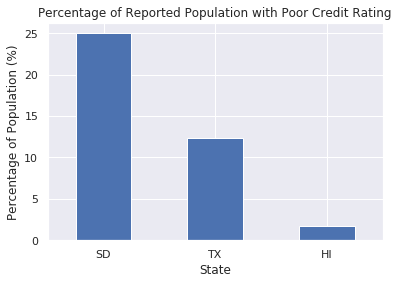

In [19]:
ax = (df[df.FICO_V30A_QUEST_SCORE_VALUE < 580].groupby('STATE_CD').size()/(df.groupby('STATE_CD').size())*100).loc[['TX','HI','SD']].sort_values(ascending=False).plot.bar(x='lab', y='val', rot=0, title='Percentage of Reported Population with Poor Credit Rating')
ax.set(xlabel='State', ylabel='Percentage of Population (%)');

#### Drop N/A rows and rows with FICO=9002, 9003

In [20]:
df.dropna(inplace=True)

In [21]:
df = df[df.FICO_V30A_QUEST_SCORE_VALUE <= 1000]

## Code for Question 1

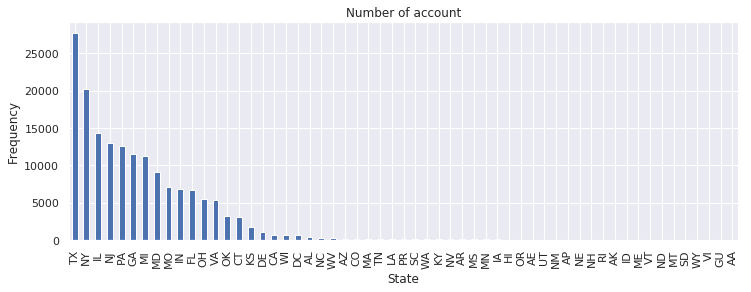

In [22]:
ax = df['STATE_CD'].value_counts().plot(kind='bar',
                                    figsize=(12,4), color='b',
                                    title="Number of account")
ax.set_xlabel("State")
ax.set_ylabel("Frequency")
# plt.show()
plt.savefig(os.path.join('figures', 'q1-bar.png'), bbox_inches='tight')

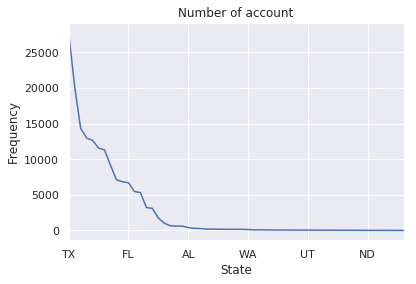

In [23]:
ax = df['STATE_CD'].value_counts().plot(kind='line',
                                    figsize=(6,4), color='b',
                                    title="Number of account")
ax.set_xlabel("State")
ax.set_ylabel("Frequency")
# plt.show()
plt.savefig(os.path.join('figures', 'q1-line.png'), bbox_inches='tight')

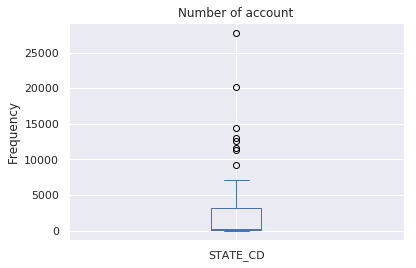

In [24]:
ax = df['STATE_CD'].value_counts().plot(kind='box',
                                    figsize=(6, 4), color='b',
                                    title="Number of account")
ax.set_ylabel("Frequency")
# plt.show()
plt.savefig(os.path.join('figures', 'q1-box.png'), bbox_inches='tight')

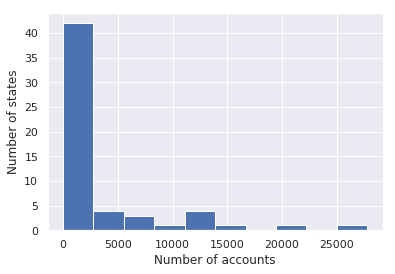

In [25]:
ax = df['STATE_CD'].value_counts().plot(kind='hist',
                                    figsize=(6,4), color='b')
ax.set_xlabel("Number of accounts")
ax.set_ylabel("Number of states")
# plt.show()
plt.savefig(os.path.join('figures', 'q1-hist.png'), bbox_inches='tight')

# Code for Question 2

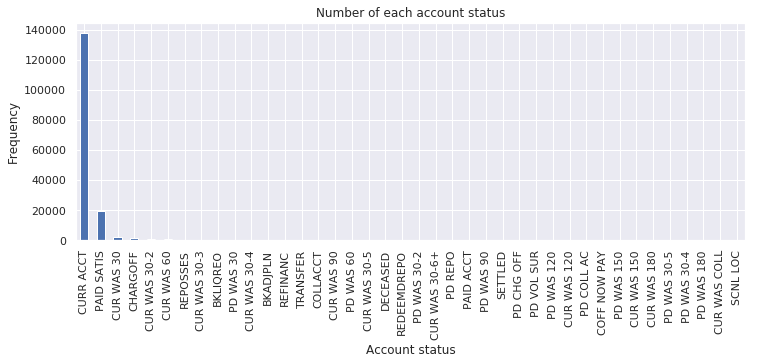

In [26]:
ax = df['ACCT_STATUS'].value_counts().plot(kind='bar',
                                    figsize=(12,4), color='b',
                                    title="Number of each account status")
ax.set_xlabel("Account status")
ax.set_ylabel("Frequency")
# plt.show()
plt.savefig(os.path.join('figures', 'q2-bar.png'), bbox_inches='tight')

# Code for Question 3

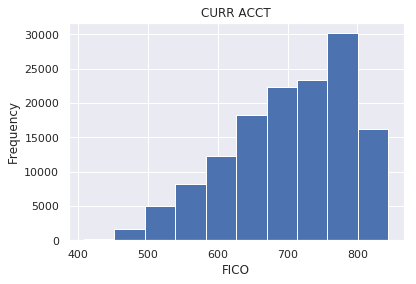

In [27]:
fig = plt.figure(figsize = (6,4))
ax = fig.gca()
df[df.ACCT_STATUS=='CURR ACCT']['FICO_V30A_QUEST_SCORE_VALUE'].hist(ax=ax)
ax.set_xlabel("FICO")
ax.set_ylabel("Frequency")
plt.title('CURR ACCT')
# plt.show()
plt.savefig(os.path.join('figures', 'q3-hist.png'), bbox_inches='tight')

# Question 4 has no code

# Code for Question 5

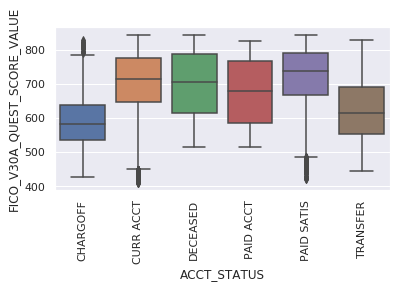

In [28]:
df_filtered=df[(df.ACCT_STATUS=='CURR ACCT')|(df.ACCT_STATUS=='PAID SATIS')|(df.ACCT_STATUS=='PAID ACCT')|
               (df.ACCT_STATUS=='DECEASED')|(df.ACCT_STATUS=='CHARGOFF')|(df.ACCT_STATUS=='TRANSFER')]
plt.figure(figsize=(6,3))
sns.boxplot(x="ACCT_STATUS", y="FICO_V30A_QUEST_SCORE_VALUE",
            data=df_filtered,
            order=sorted(df_filtered.ACCT_STATUS.unique()))
plt.xticks(rotation=90)
# plt.show()
plt.savefig(os.path.join('figures', 'q5-box.png'), bbox_inches='tight')

# Code for Question 6

In [30]:
# Import libraries
import pandas as pd
import folium
 
# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
state_geo = os.path.join('us-states.json')
 
state_data = df.groupby('STATE_CD')['FICO_V30A_QUEST_SCORE_VALUE'].mean()
m = folium.Map(width=750,height=430, location=[40, -95], zoom_start=3.5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['State', 'FICO_V30A_QUEST_SCORE_VALUE'],
 key_on='feature.id',
 fill_color='Spectral',
 fill_opacity=1.0,
 line_opacity=1.0,
 legend_name='Mean of FICO score per state'
)
folium.LayerControl().add_to(m)
m

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# Code for Question 7

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x="ACCT_STATUS", y="VANTAGE_V3_SCORE",
            data=df,
            order=sorted(df.ACCT_STATUS.unique()))
plt.xticks(rotation=90)
# plt.show()
plt.savefig(os.path.join('figures', 'q7-box.png'), bbox_inches='tight')

# Code for Question 13

In [ ]:
good1 = df[df.ACCT_STATUS=="CURR ACCT"]
good2 = df[df.ACCT_STATUS=="PAID SATIS"]
# badind = c("CUR WAS 30","CHARGOFF","CUR WAS 30-2","CUR WAS 60","REPOSSES","CUR WAS 30-3")
bad = df[~df.ACCT_STATUS.isin(["CURR ACCT","PAID SATIS",""])]

In [ ]:
res = np.zeros(800)
for i in range(800):
    res[i] = np.sum(good1.FICO_V30A_QUEST_SCORE_VALUE > i) - sum(bad.FICO_V30A_QUEST_SCORE_VALUE > i)

plt.figure(figsize=(8,4))
plt.plot(res)
plt.xlabel('FICO Score')
plt.ylabel('No. of good accounts - No. of bad accounts')
plt.title('Difference in number of good and bad accounts given FICO score threshold')
# plt.show()
plt.savefig(os.path.join('figures','q13-diff-fico.png'), bbox_inches='tight')

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(good1.FICO_V30A_QUEST_SCORE_VALUE, bw=5, label='CURR ACCT')
sns.kdeplot(good2.FICO_V30A_QUEST_SCORE_VALUE, bw=5, label='PAID SATIS')
sns.kdeplot(bad.FICO_V30A_QUEST_SCORE_VALUE, bw=5, label='Other statuses')
# plt.xlabel('FICO Score')
plt.ylabel('Density')
plt.title('Plotting FICO by ACCT STATUS')
# plt.show()
plt.savefig(os.path.join('figures','q13-density.png'), bbox_inches='tight')

# Code for Question 14

In [ ]:
import statsmodels.api as sm
sm.qqplot(df.FICO_V30A_QUEST_SCORE_VALUE)
# plt.show()
plt.savefig(os.path.join('figures','q14-qqplot.png'), bbox_inches='tight')

In [ ]:
plt.hist(df.VANTAGE_V3_SCORE)
plt.title('Vantage Score')
# plt.show()
plt.savefig(os.path.join('figures','q14-hist.png'), bbox_inches='tight')

In [ ]:
plt.plot(df.VANTAGE_V3_SCORE, linestyle='', marker='o')
plt.title('Vantage Score')
plt.xlabel('Index')
plt.ylabel('Vantage Score')
plt.savefig(os.path.join('figures','q14-scatter.png'), bbox_inches='tight')